# 12.Proje-Mağaza Satışları Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date

In [7]:
import shutil

# 'kaggle.json' dosyasını /root/.kaggle/ dizinine taşı
shutil.move('/content/kaggle.json', '/root/.kaggle/kaggle.json')


'/root/.kaggle/kaggle.json'

In [8]:
import os

# Kaggle API anahtarlarını ayarla
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle/"

In [9]:
!kaggle competitions download -c store-sales-time-series-forecasting

 42% 9.00M/21.4M [00:00<00:00, 40.7MB/s]
100% 21.4M/21.4M [00:00<00:00, 82.6MB/s]


In [10]:
!unzip store-sales-time-series-forecasting.zip -d store-sales-time-series-forecasting

Archive:  store-sales-time-series-forecasting.zip
  inflating: store-sales-time-series-forecasting/holidays_events.csv  
  inflating: store-sales-time-series-forecasting/oil.csv  
  inflating: store-sales-time-series-forecasting/sample_submission.csv  
  inflating: store-sales-time-series-forecasting/stores.csv  
  inflating: store-sales-time-series-forecasting/test.csv  
  inflating: store-sales-time-series-forecasting/train.csv  
  inflating: store-sales-time-series-forecasting/transactions.csv  


In [11]:
import pandas as pd

# CSV dosyalarını tanımla
holidays_events_df = pd.read_csv('/content/store-sales-time-series-forecasting/holidays_events.csv')
oil_df = pd.read_csv('/content/store-sales-time-series-forecasting/oil.csv')
sample_submission_df = pd.read_csv('/content/store-sales-time-series-forecasting/sample_submission.csv')
stores_df = pd.read_csv('/content/store-sales-time-series-forecasting/stores.csv')
df_test = pd.read_csv('/content/store-sales-time-series-forecasting/test.csv')
df_train = pd.read_csv('/content/store-sales-time-series-forecasting/train.csv')
transactions_df = pd.read_csv('/content/store-sales-time-series-forecasting/transactions.csv')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df_oil=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
df_holidays=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
df_stores=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
df_train=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
df_test=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
df_transactions=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")

In [12]:
print(df_train.head()) #Train eğitim dosyamız
print(df_train.shape)

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
(3000888, 6)


Sutun içeriklerini şu şekil anlatabiliriz:
- `id`: Benzersiz bir kimlik numarası. Her satırın farklı bir kimlik numarası vardır.
- `date`: Satışın gerçekleştiği tarih. Bu sütun, "YYYY-MM-DD" formatındadır.
- `store_nbr`: Mağaza numarası. Her mağaza farklı bir numaraya sahiptir.
- `family`: Ürünün ait olduğu ürün ailesi veya kategorisi.
- `sales`: Belirli bir tarih ve mağaza için satılan birim sayısı. Bu sütun, 0.0 değeriyle başlıyor, bu da o gün için hiç satış yapılmadığını gösterir.
- `onpromotion`: Ürünün o tarihte promosyon (indirim) durumunu belirten bir sütun. 0, promosyonun olmadığını; 1, promosyonun olduğunu gösterir.

Örneğin, ilk satır şu bilgileri içerir:
- `id`: 0
- `date`: 2013-01-01
- `store_nbr`: 1
- `family`: AUTOMOTIVE
- `sales`: 0.0 (hiç satış yok)
- `onpromotion`: 0 (promosyon yok)

Her bir satır, belirli bir mağazanın belirli bir ürünü için belirli bir tarihteki satış bilgilerini temsil eder. Bu tür veri setleri, zaman serisi tahminleme modelleri geliştirmek için kullanılır.

In [13]:
print(df_test.head()) #Test dosyamız
print(df_test.shape)

        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0
(28512, 5)


In [14]:
print(df_oil.head())
#Bu dosya, petrol fiyatları gibi ekonomik faktörleri içerebilir.
#date: Petrol fiyatlarının tarihi.
#dcoilwtico: Batı Teksas Petrolü (WTI) fiyatı.
print(df_oil.shape)

NameError: ignored

In [15]:
print(df_holidays.head())
#Bu dosya, tatil ve etkinlik bilgilerini içerir.
#date: Tatil veya etkinliğin tarihi.
#type: Tatil veya etkinlik tipi (Ulusal, Yerel, vb.).
#locale: Tatil veya etkinliğin yeri (Ulusal, Bölgesel, vb.).
#description: Tatil veya etkinlik açıklaması.
print(df_holidays.shape)

NameError: ignored

 `date`: Tatil veya etkinliğin tarihi. Bu sütun, "YYYY-MM-DD" formatındadır.
- `type`: Tatil veya etkinlik tipini belirten bir sütun. Örneğin, "Holiday" (Tatil) veya "Event" (Etkinlik) olabilir.
- `locale`: Tatil veya etkinliğin yeri hakkında bilgi veren bir sütun. Örneğin, "Local" (Yerel) veya "Regional" (Bölgesel) olabilir.
- `locale_name`: Tatil veya etkinliğin yer adını içeren bir sütun. Örneğin, "Manta" veya "Cotopaxi" gibi.
- `description`: Tatil veya etkinliğin açıklamasını içeren bir sütun. Bu sütun, tatilin veya etkinliğin neden kutlandığını ifade edebilir.
- `transferred`: Tatilin veya etkinliğin başka bir güne ertelendiğini gösteren bir sütun. "True" ise ertelenmiş, "False" ise ertelenmemiştir.

Örneğin, ilk satır şu bilgileri içerir:
- `date`: 2012-03-02
- `type`: Holiday (Tatil)
- `locale`: Local (Yerel)
- `locale_name`: Manta
- `description`: Fundacion de Manta
- `transferred`: False (Ertelenmemiş)

Bu bilgiler, 2012-03-02 tarihinde Manta şehrinde "Fundacion de Manta" adlı yerel bir tatilin gerçekleşmediğini ve ertelenmediğini gösterir. Diğer satırlar da benzer şekilde tatil ve etkinlik bilgilerini temsil eder.

In [16]:
print(df_transactions.head())
#Bu dosya, işlem bilgilerini içerir.
#date: İşlemin tarihi.
#store_nbr: Mağaza numarası.
#transactions: Bir günde gerçekleşen toplam işlem sayısı.
print(df_transactions.shape)

NameError: ignored

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [18]:
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [19]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [20]:
df_train.corr(numeric_only=True)

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


In [21]:
df_train.head(3)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [22]:
df_train["family"].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [23]:
# Tarih sütununu datetime veri tipine dönüştürün
df_train["date"] = pd.to_datetime(df_train["date"], format="%Y-%m-%d")

# Veri Görselleştirme

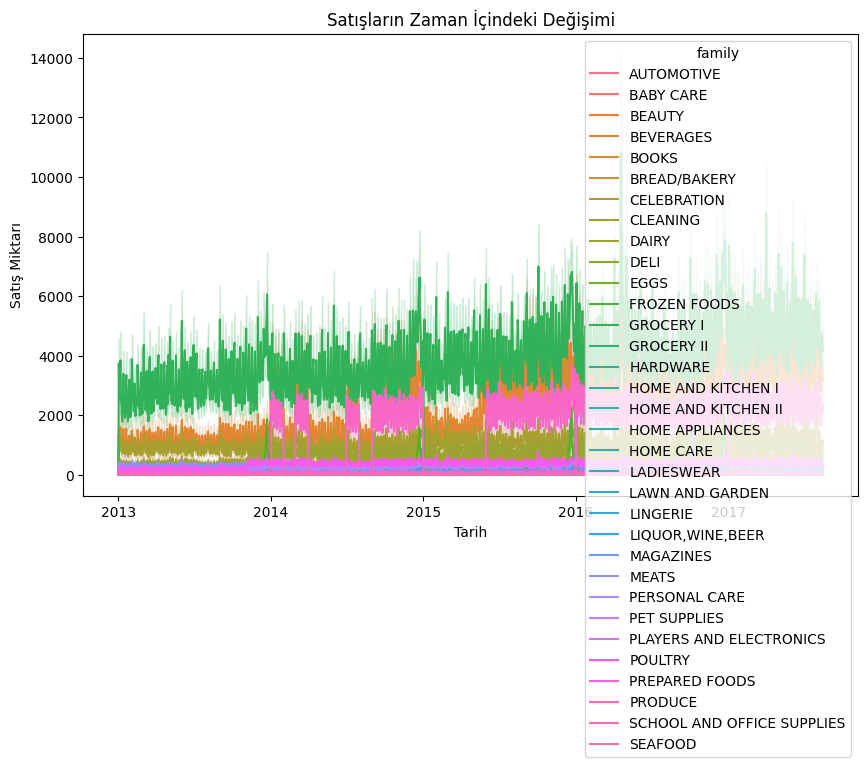

In [24]:
# 1. Satışların zaman içindeki değişimi için bir çizgi grafiği
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sales', data=df_train, hue='family')
plt.title('Satışların Zaman İçindeki Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Satış Miktarı')
plt.show()

<ipython-input-25-b557b6d6fcdf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family', y='sales', data=df_train, ci=None)


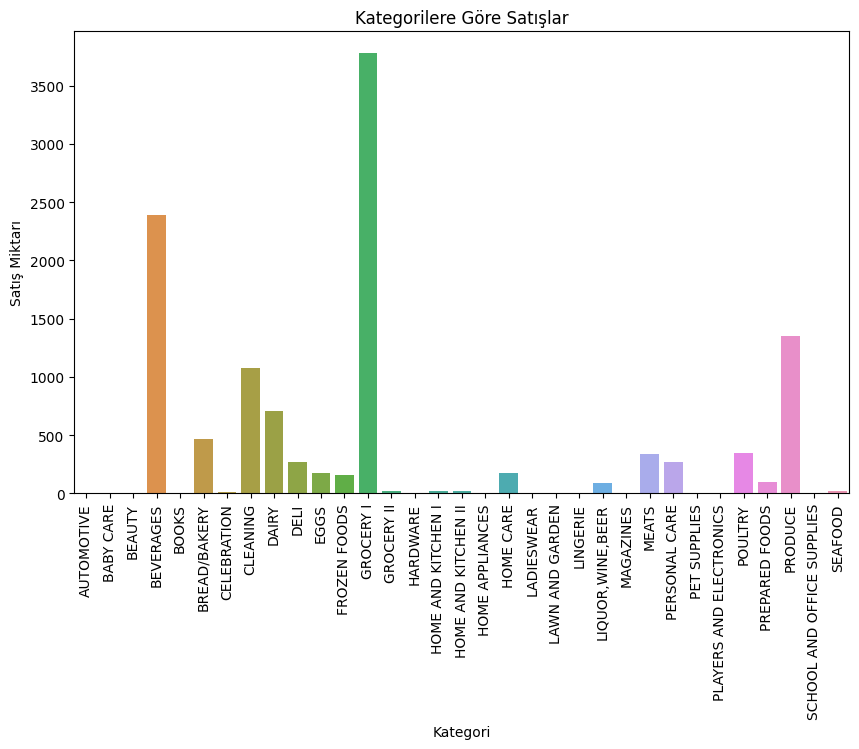

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='family', y='sales', data=df_train, ci=None)
plt.title('Kategorilere Göre Satışlar')
plt.xlabel('Kategori')
plt.ylabel('Satış Miktarı')
plt.xticks(rotation=90)  # x eksenindeki kategori etiketlerini 90 derece çevirin
plt.show()

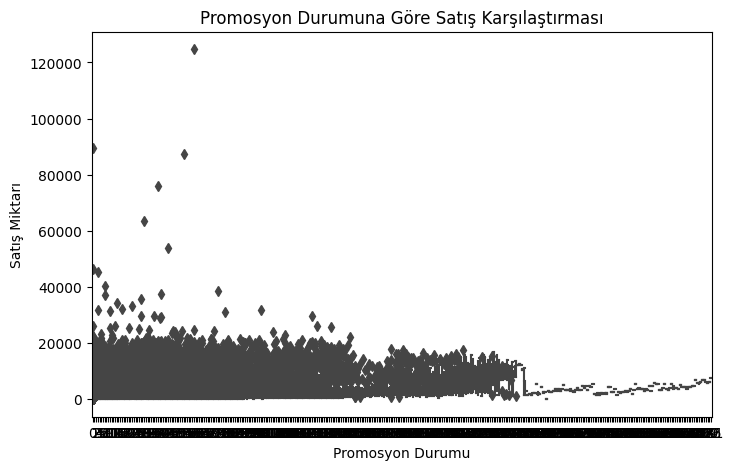

In [26]:
# 3. Promosyon durumuna göre satışların karşılaştırılması
plt.figure(figsize=(8, 5))
sns.boxplot(x='onpromotion', y='sales', data=df_train)
plt.title('Promosyon Durumuna Göre Satış Karşılaştırması')
plt.xlabel('Promosyon Durumu')
plt.ylabel('Satış Miktarı')
plt.show()

In [27]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

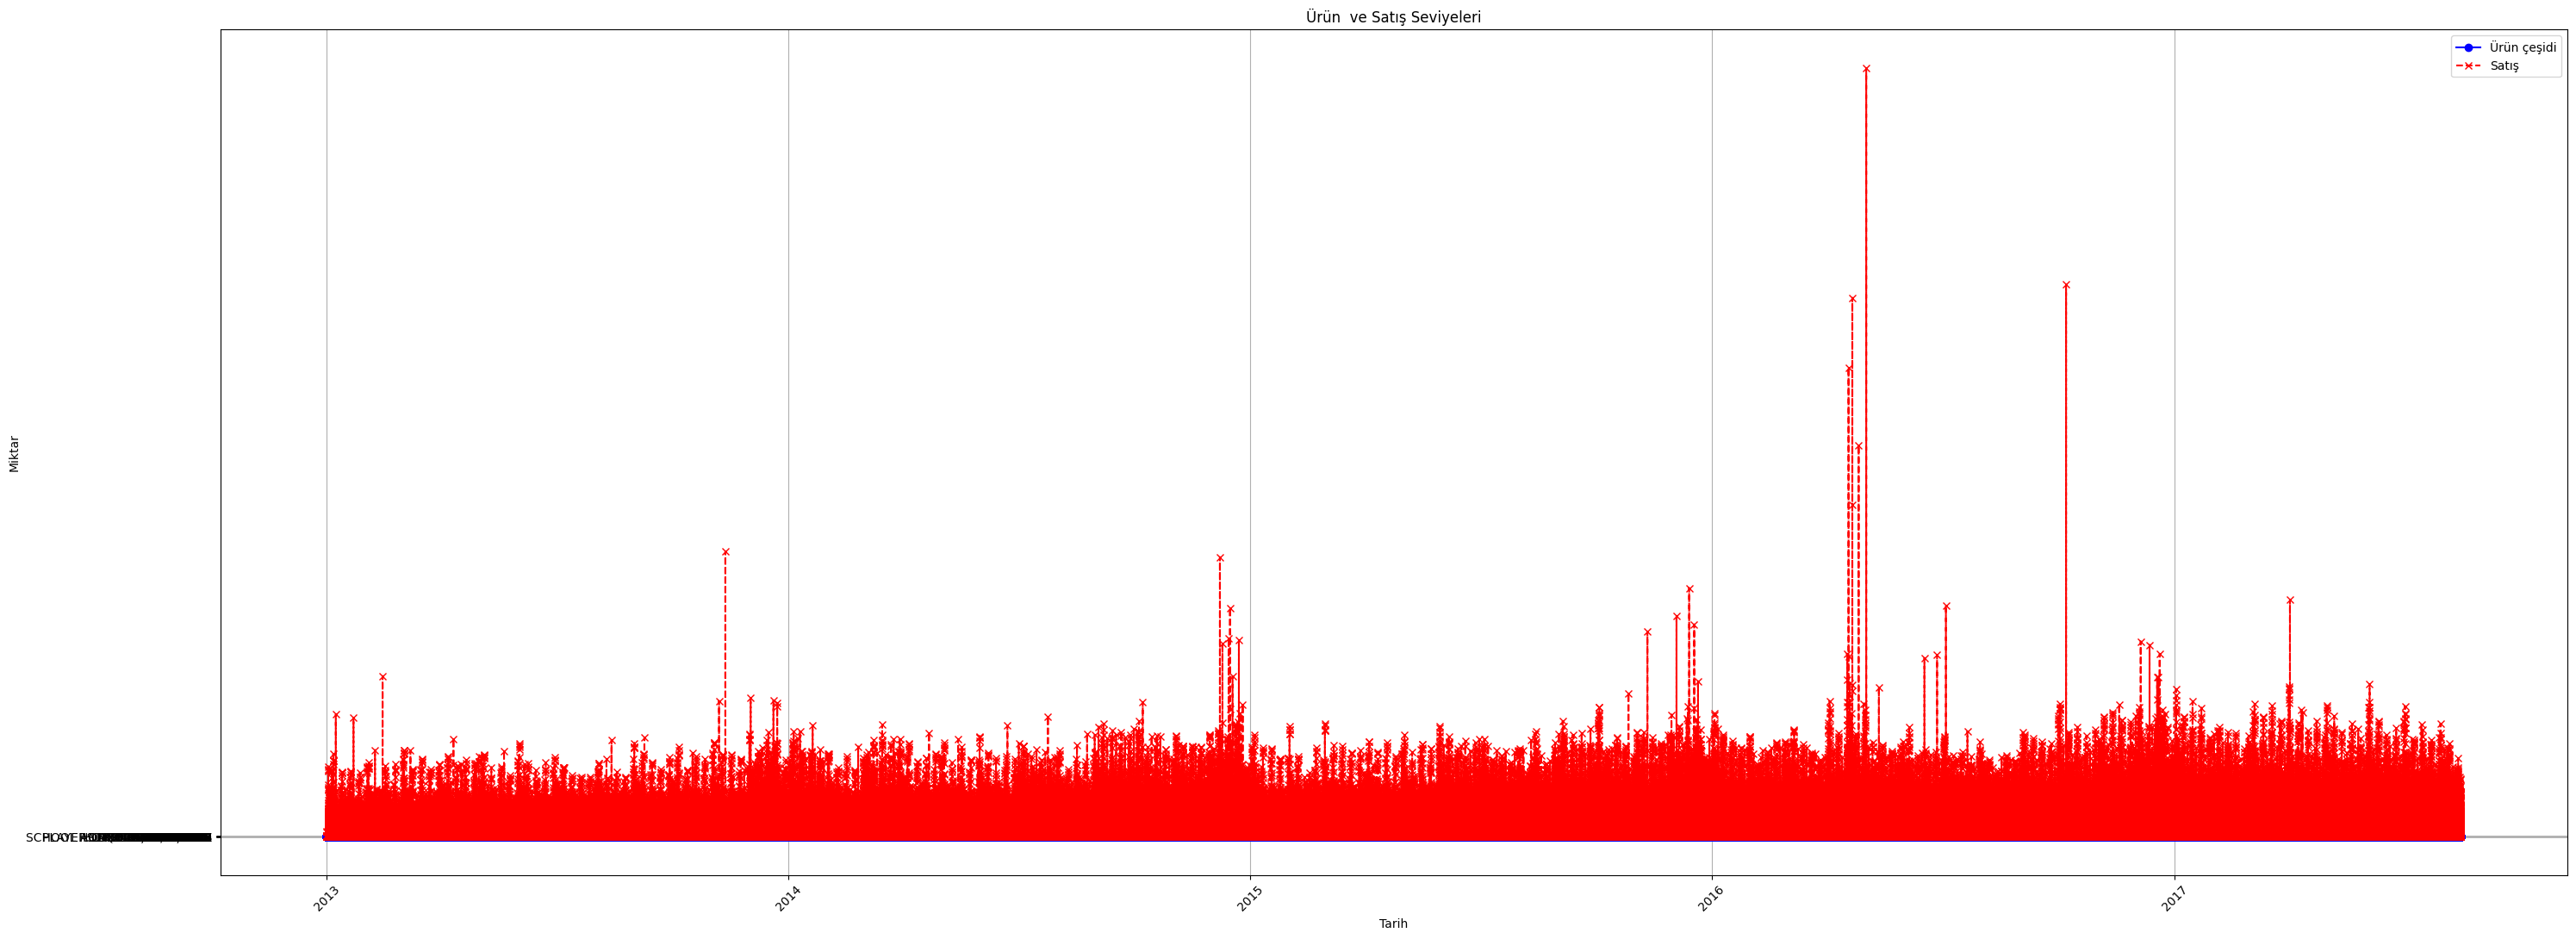

In [28]:
# Çizgi grafiği oluşturun
plt.figure(figsize=(30, 11))
plt.plot(df_train["date"], df_train["family"], marker='o', label='Ürün çeşidi', linestyle='-', color='b')
plt.plot(df_train["date"], df_train["sales"], marker='x', label='Satış', linestyle='--', color='r')

# Grafik başlığı ve etiketleri ayarlayın
plt.title('Ürün  ve Satış Seviyeleri')
plt.xlabel('Tarih')
plt.ylabel('Miktar')
plt.xticks(rotation=45)  # Tarih etiketlerini 45 derece döndür

# Eksenleri ayarlayın
plt.grid(True)
plt.legend()

# Grafiği göster
plt.tight_layout()
plt.show()

In [29]:
# Ürün için:
fig_family = px.line(df_train, x='date',
                     y='family',
                     title='Tarihe Göre Ürün')
fig_family.show()

In [ ]:
# Satış:
fig_sales = px.line(df_train, x='date',
                        y='sales',
                        title='Tarihlere göre Satış')
fig_sales.show()

In [ ]:
# Tarih ile satışları gösteren bir scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='date', y='sales', data=df_train, hue='family', marker='o')
plt.title('Satışların Tarih İle Dağılımı (Örnekleme)')
plt.xlabel('Tarih')
plt.ylabel('Satış Miktarı')
plt.show()

# Modele Hazırlama

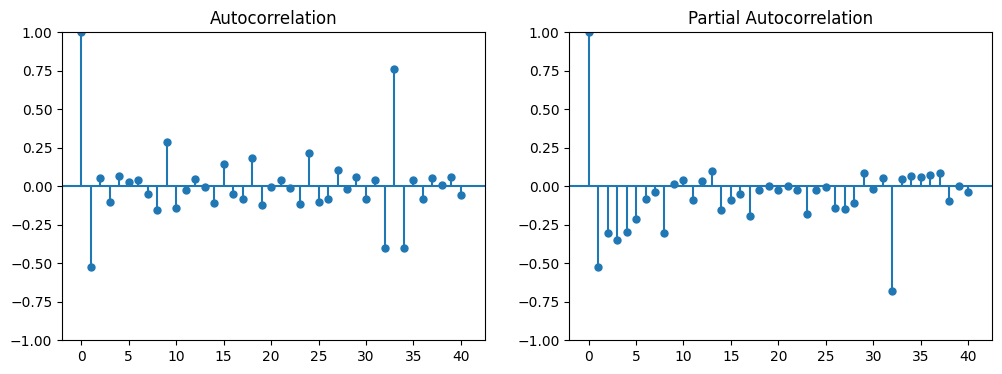

In [ ]:
# Modele Hazırlama
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 'sales' sütununu seçin
sales_series = df_train['sales']

# Differansiyasyon işlemi
differenced_series = sales_series.diff().dropna()

# ACF ve PACF grafiklerini çiz
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(differenced_series, lags=40, ax=axes[0])  # Lags parametresi, çizilen gecikme sayısını belirler
sm.graphics.tsa.plot_pacf(differenced_series, lags=40, ax=axes[1])
plt.show()

In [32]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(df_train['sales'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

# Modelleme

# Prophet Paketi ile Tahmin

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Prophet için uygun sütun adlarını kullanarak veri çerçevesini yeniden adlandırın
forecast_data = df_train.rename(columns={"date": "ds", "sales": "y"})

# Prophet modelini oluşturun ve eğitin
model = Prophet()
model.fit(forecast_data)

# Gelecekteki dönemleri oluşturun (örneğin, 365 gün sonrasını tahmin etmek için)
future = model.make_future_dataframe(periods=365)

# Tahminleri yapın
forecast = model.predict(future)

# Tahminleri çizdirin
fig = plot_plotly(model, forecast)
fig.show()

# Bileşenleri çizdirin (trend, haftalık, yıllık)
fig2 = plot_components_plotly(model, forecast)
fig2.show()

In [ ]:
df_test.head()

In [ ]:
# Test verisi içindeki gerçek talep verilerini alın
actual_sales = df_test["sales"]

# Modelin tahminlerini yapın
forecast_steps = len(df_test)  # Test verisi uzunluğu kadar tahmin yapın
forecast = fitted.forecast(steps=forecast_steps)

# Tahminleri ve gerçek verileri görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(actual_sales.index, actual_sales, label="Gerçek Veriler")
plt.plot(actual_sales.index, forecast, label="Tahminler", color='red')
plt.xlabel("Zaman")
plt.ylabel("Talep")
plt.legend()
plt.show()